In [33]:
import json
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [53]:
with open("training/training/label.idl") as f:
    lines = f.readlines()[:2]
print lines 

['{"60091.jpg": [[214.1664, 192.99996, 261.00032, 224.83332000000001, 1], [74.83328, 160.49988, 224.0, 267.4998, 1]]}\n', '{"60092.jpg": [[15.166656, 197.49996, 80.16640000000001, 233.49996000000002, 1], [52.250048, 215.49996, 85.49951999999999, 254.5002, 3]]}\n']


In [57]:
label_np = {}
with open("training/training/label.idl") as f:
    for line in f:
        jsonload = json.loads(line)
        assert len(jsonload.keys()) == 1, "Only one image per json file"
        label_np[jsonload.keys()[0]] = jsonload[jsonload.keys()[0]]
print type(jsonload)
print jsonload.keys()
print jsonload[jsonload.keys()[0]]

<type 'dict'>
[u'70090.jpg']
[[0.8333311999999999, 173.66652, 116.83328, 249.83316, 1], [221.66656, 175.83336, 293.33312, 219.99996, 1], [289.49952, 159.33348, 329.16672, 206.83332, 1], [297.66656, 168.1668, 422.0, 266.00004, 1], [154.99968, 170.66664, 227.8336, 213.16680000000002, 1]]


In [59]:
len(label_np.keys())

10000

In [28]:
allbox = [obj for key in label_np.keys() for obj in label_np[key]]
len(allbox)

53901

In [23]:
carbox = [key for key in label_np.keys() for obj in label_np[key] if obj[-1] == 1 ]
peoplebox = [key for key in label_np.keys() for obj in label_np[key] if obj[-1] == 2 ]
motorcyclesbox = [key for key in label_np.keys() for obj in label_np[key] if obj[-1] == 3 ]
trafficlightbox = [key for key in label_np.keys() for obj in label_np[key] if obj[-1] == 20 ]

In [30]:
print len(carbox), len(peoplebox), len(motorcyclesbox), len(trafficlightbox)

45357 4149 2889 1506


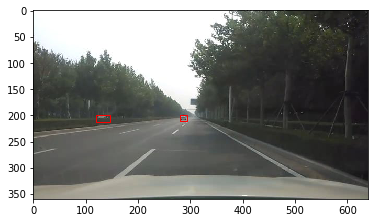

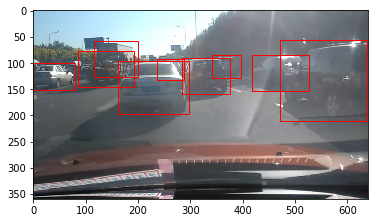

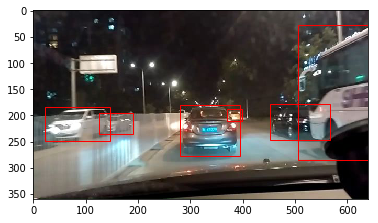

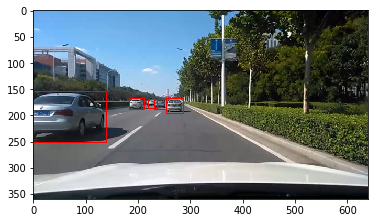

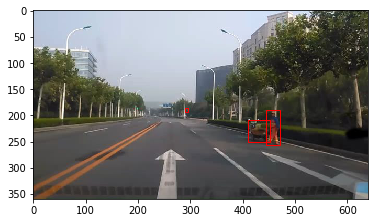

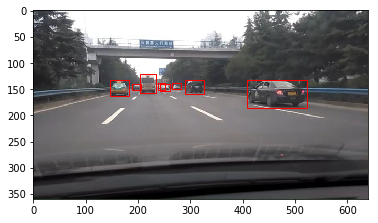

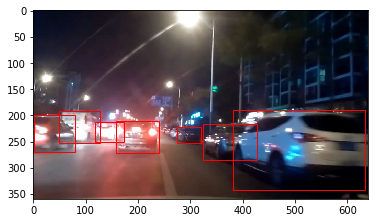

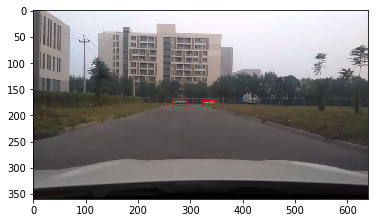

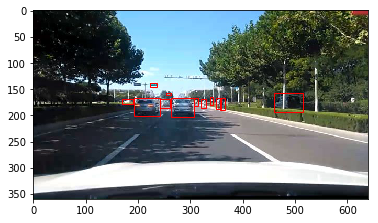

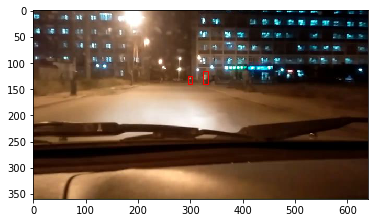

In [45]:
for key in label_np.keys()[:10]:
    im = plt.imread("training/training/"+key)
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    for box in label_np[key]:
        x1, y1, x2, y2, _ = box
        x = int(x1)
        y = int(y1)
        w = int(x2-x1)
        h = int(y2-y1)
        # Create a Rectangle patch
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

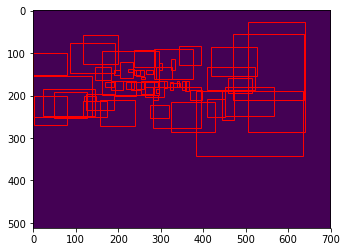

In [66]:
# Create figure and axes
fig,ax = plt.subplots(1)
im = np.ones(shape=(512,700))
ax.imshow(im)
for key in label_np.keys()[:10]:
    for box in label_np[key]:
        x1, y1, x2, y2, _ = box
        x = int(x1)
        y = int(y1)
        w = int(x2-x1)
        h = int(y2-y1)
        # Create a Rectangle patch
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
plt.show()

In [ ]:
13 by 13 by num_anchor by (5+4)